#  CLIMATE CHANGE EARTH SURFACE

This notebook explores the intersection of land and ocean conditions, LandAverageTemperature, LandAndOceanAverageTemperature etc. Using global datasets, we analyze historical data and build predictive models to forecast future outcomes for temperature and climate change.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import tree

In [3]:
a = pd.read_csv("GlobalTemperatures.csv")
a

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
3187,2015-08-01,14.755,0.072,20.699,0.110,9.005,0.170,17.589,0.057
3188,2015-09-01,12.999,0.079,18.845,0.088,7.199,0.229,17.049,0.058
3189,2015-10-01,10.801,0.102,16.450,0.059,5.232,0.115,16.290,0.062
3190,2015-11-01,7.433,0.119,12.892,0.093,2.157,0.106,15.252,0.063


In [4]:
# a.fillna(method = "bfill")
# a.fillna(method = "ffill")
# a

In [5]:
b = a.dropna(subset=['LandAndOceanAverageTemperature'])
b

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
1200,1850-01-01,0.749,1.105,8.242,1.738,-3.206,2.822,12.833,0.367
1201,1850-02-01,3.071,1.275,9.970,3.007,-2.291,1.623,13.588,0.414
1202,1850-03-01,4.954,0.955,10.347,2.401,-1.905,1.410,14.043,0.341
1203,1850-04-01,7.217,0.665,12.934,1.004,1.018,1.329,14.667,0.267
1204,1850-05-01,10.004,0.617,15.655,2.406,3.811,1.347,15.507,0.249
...,...,...,...,...,...,...,...,...,...
3187,2015-08-01,14.755,0.072,20.699,0.110,9.005,0.170,17.589,0.057
3188,2015-09-01,12.999,0.079,18.845,0.088,7.199,0.229,17.049,0.058
3189,2015-10-01,10.801,0.102,16.450,0.059,5.232,0.115,16.290,0.062
3190,2015-11-01,7.433,0.119,12.892,0.093,2.157,0.106,15.252,0.063


In [6]:
b.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
1200,1850-01-01,0.749,1.105,8.242,1.738,-3.206,2.822,12.833,0.367
1201,1850-02-01,3.071,1.275,9.970,3.007,-2.291,1.623,13.588,0.414
1202,1850-03-01,4.954,0.955,10.347,2.401,-1.905,1.410,14.043,0.341
1203,1850-04-01,7.217,0.665,12.934,1.004,1.018,1.329,14.667,0.267
1204,1850-05-01,10.004,0.617,15.655,2.406,3.811,1.347,15.507,0.249


In [7]:
b.tail()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
3187,2015-08-01,14.755,0.072,20.699,0.110,9.005,0.170,17.589,0.057
3188,2015-09-01,12.999,0.079,18.845,0.088,7.199,0.229,17.049,0.058
3189,2015-10-01,10.801,0.102,16.450,0.059,5.232,0.115,16.290,0.062
3190,2015-11-01,7.433,0.119,12.892,0.093,2.157,0.106,15.252,0.063
3191,2015-12-01,5.518,0.100,10.725,0.154,0.287,0.099,14.774,0.062


In [8]:
b.describe()

,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
count,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000
mean,8.571583,0.276663,14.350601,0.479782,2.743595,0.431849,15.212566,0.128532
std,4.263193,0.224030,4.309579,0.583203,4.155835,0.445838,1.274093,0.073587
min,0.404000,0.034000,5.900000,0.044000,-5.407000,0.045000,12.475000,0.042000
25%,4.430000,0.099750,10.212000,0.142000,-1.334500,0.155000,14.047000,0.063000
50%,8.850500,0.230000,14.760000,0.252000,2.949500,0.279000,15.251000,0.122000
75%,12.858500,0.347250,18.451500,0.539000,6.778750,0.458250,16.396250,0.151000
max,15.482000,1.492000,21.320000,4.373000,9.715000,3.498000,17.611000,0.457000


In [9]:
b.isnull().sum()

dt                                           0
LandAverageTemperature                       0
LandAverageTemperatureUncertainty            0
LandMaxTemperature                           0
LandMaxTemperatureUncertainty                0
LandMinTemperature                           0
LandMinTemperatureUncertainty                0
LandAndOceanAverageTemperature               0
LandAndOceanAverageTemperatureUncertainty    0
dtype: int64

In [10]:
b.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1992 entries, 1200 to 3191
Data columns (total 9 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   dt                                         1992 non-null   object 
 1   LandAverageTemperature                     1992 non-null   float64
 2   LandAverageTemperatureUncertainty          1992 non-null   float64
 3   LandMaxTemperature                         1992 non-null   float64
 4   LandMaxTemperatureUncertainty              1992 non-null   float64
 5   LandMinTemperature                         1992 non-null   float64
 6   LandMinTemperatureUncertainty              1992 non-null   float64
 7   LandAndOceanAverageTemperature             1992 non-null   float64
 8   LandAndOceanAverageTemperatureUncertainty  1992 non-null   float64
dtypes: float64(8), object(1)
memory usage: 155.6+ KB


converting Date into seperate year and month columns

In [12]:
b['dt'] = pd.to_datetime(b['dt'])     
b['year'] = b['dt'].dt.year
b['month'] = b['dt'].dt.month
b.drop('dt', axis=1, inplace=True)    

C:\Users\laswi\AppData\Local\Temp\ipykernel_29780\3694488221.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  b['dt'] = pd.to_datetime(b['dt'])
C:\Users\laswi\AppData\Local\Temp\ipykernel_29780\3694488221.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  b['year'] = b['dt'].dt.year
C:\Users\laswi\AppData\Local\Temp\ipykernel_29780\3694488221.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the 

In [13]:
b

,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty,year,month
1200,0.749,1.105,8.242,1.738,-3.206,2.822,12.833,0.367,1850,1
1201,3.071,1.275,9.970,3.007,-2.291,1.623,13.588,0.414,1850,2
1202,4.954,0.955,10.347,2.401,-1.905,1.410,14.043,0.341,1850,3
1203,7.217,0.665,12.934,1.004,1.018,1.329,14.667,0.267,1850,4
1204,10.004,0.617,15.655,2.406,3.811,1.347,15.507,0.249,1850,5
...,...,...,...,...,...,...,...,...,...,...
3187,14.755,0.072,20.699,0.110,9.005,0.170,17.589,0.057,2015,8
3188,12.999,0.079,18.845,0.088,7.199,0.229,17.049,0.058,2015,9
3189,10.801,0.102,16.450,0.059,5.232,0.115,16.290,0.062,2015,10
3190,7.433,0.119,12.892,0.093,2.157,0.106,15.252,0.063,2015,11


#  CORRELATION

In [15]:
b.corr()

,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty,year,month
LandAverageTemperature,1.000000,-0.143129,0.995807,-0.108462,0.995611,-0.167451,0.988066,-0.131412,9.592058e-02,2.659592e-01
LandAverageTemperatureUncertainty,-0.143129,1.000000,-0.132905,0.866944,-0.165066,0.888717,-0.208008,0.972405,-8.358164e-01,-8.517483e-02
LandMaxTemperature,0.995807,-0.132905,1.000000,-0.105349,0.993404,-0.160020,0.983855,-0.120563,8.423813e-02,2.456699e-01
LandMaxTemperatureUncertainty,-0.108462,0.866944,-0.105349,1.000000,-0.123251,0.868702,-0.163396,0.860425,-7.362392e-01,-3.664318e-02
LandMinTemperature,0.995611,-0.165066,0.993404,-0.123251,1.000000,-0.185512,0.986402,-0.154931,1.322915e-01,2.867812e-01
LandMinTemperatureUncertainty,-0.167451,0.888717,-0.160020,0.868702,-0.185512,1.000000,-0.221746,0.880062,-7.582196e-01,-4.472502e-02
LandAndOceanAverageTemperature,0.988066,-0.208008,0.983855,-0.163396,0.986402,-0.221746,1.000000,-0.203072,2.012691e-01,2.095411e-01
LandAndOceanAverageTemperatureUncertainty,-0.131412,0.972405,-0.120563,0.860425,-0.154931,0.880062,-0.203072,1.000000,-8.799638e-01,-5.435353e-02
year,0.095921,-0.835816,0.084238,-0.736239,0.132291,-0.758220,0.201269,-0.879964,1.000000e+00,4.276421e-16
month,0.265959,-0.085175,0.245670,-0.036643,0.286781,-0.044725,0.209541,-0.054354,4.276421e-16,1.000000e+00


In [16]:
c = b.drop(["LandAverageTemperatureUncertainty", "LandMaxTemperatureUncertainty", "LandMinTemperatureUncertainty", "LandAndOceanAverageTemperatureUncertainty"], axis = 1)
c

,LandAverageTemperature,LandMaxTemperature,LandMinTemperature,LandAndOceanAverageTemperature,year,month
1200,0.749,8.242,-3.206,12.833,1850,1
1201,3.071,9.970,-2.291,13.588,1850,2
1202,4.954,10.347,-1.905,14.043,1850,3
1203,7.217,12.934,1.018,14.667,1850,4
1204,10.004,15.655,3.811,15.507,1850,5
...,...,...,...,...,...,...
3187,14.755,20.699,9.005,17.589,2015,8
3188,12.999,18.845,7.199,17.049,2015,9
3189,10.801,16.450,5.232,16.290,2015,10
3190,7.433,12.892,2.157,15.252,2015,11


#  TRAIN TEST SPLIT

In [35]:
from sklearn.model_selection import train_test_split

In [37]:
x = c[["LandMaxTemperature", "LandMinTemperature", "LandAndOceanAverageTemperature", "year", "month"]]
x

,LandMaxTemperature,LandMinTemperature,LandAndOceanAverageTemperature,year,month
1200,8.242,-3.206,12.833,1850,1
1201,9.970,-2.291,13.588,1850,2
1202,10.347,-1.905,14.043,1850,3
1203,12.934,1.018,14.667,1850,4
1204,15.655,3.811,15.507,1850,5
...,...,...,...,...,...
3187,20.699,9.005,17.589,2015,8
3188,18.845,7.199,17.049,2015,9
3189,16.450,5.232,16.290,2015,10
3190,12.892,2.157,15.252,2015,11


In [41]:
y = c[["LandAverageTemperature"]]
y

,LandAverageTemperature
1200,0.749
1201,3.071
1202,4.954
1203,7.217
1204,10.004
...,...
3187,14.755
3188,12.999
3189,10.801
3190,7.433


In [43]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=42)
xtrain,xtest,ytrain,ytest

(      LandMaxTemperature  LandMinTemperature  LandAndOceanAverageTemperature  \
 2009              18.889               6.792                          16.239   
 2485               8.708              -2.510                          13.804   
 2652               8.531              -2.531                          13.615   
 3151              20.709               8.840                          17.420   
 2290              11.667               0.520                          14.377   
 ...                  ...                 ...                             ...   
 2330              11.517              -0.400                          14.632   
 2494              11.849               0.831                          14.516   
 2060              17.785               5.996                          16.166   
 2659              19.593               8.086                          16.752   
 2326              11.870               0.592                          14.530   
 
       year  month  
 2009

#  LINEAR REGRESSION

In [46]:
from sklearn.linear_model import LinearRegression

In [48]:
e = LinearRegression()
e

LinearRegression()

In [50]:
e.fit(xtrain,ytrain)

LinearRegression()

In [52]:
e.score(xtest,ytest)

0.997533091954569

In [54]:
e.predict(xtest)

array([[ 3.80399383],
       [ 8.5863531 ],
       [13.46232313],
       [ 2.40080463],
       [ 6.03234592],
       [ 4.70622769],
       [15.00263484],
       [ 7.54192428],
       [ 3.96146667],
       [ 4.59819128],
       [14.04690349],
       [13.73520343],
       [ 5.0718146 ],
       [ 9.40856546],
       [ 6.01512826],
       [14.44479065],
       [10.94600072],
       [ 2.20473184],
       [ 6.15622395],
       [ 4.30373559],
       [ 5.39773554],
       [10.60355252],
       [ 4.55895363],
       [ 3.77573543],
       [ 5.11276445],
       [12.11225721],
       [13.0421283 ],
       [10.64686196],
       [ 9.2533532 ],
       [ 8.47965871],
       [ 5.65219337],
       [13.76815007],
       [ 2.36321742],
       [ 3.70963863],
       [14.36118967],
       [13.15058593],
       [ 5.55343068],
       [ 9.34945611],
       [ 3.6205424 ],
       [ 4.95974567],
       [13.72855221],
       [ 2.75962227],
       [12.49799864],
       [13.85782253],
       [ 1.58699378],
       [ 5

#  SVM(SUPPORT VECTOR MACHINE)

In [59]:
from sklearn.svm import SVR

In [61]:
f = SVR()
f.fit( xtrain, ytrain)

C:\Users\laswi\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [67]:
f.score(xtest,ytest)

0.006958058504498266

In [65]:
f.predict(xtest)

array([8.81178673, 9.09512241, 8.74298862, 8.85402671, 8.89756015,
       8.85011832, 9.23011501, 9.18221708, 8.77701198, 9.03826731,
       8.75877571, 8.76784035, 9.16536999, 9.02823886, 9.02072245,
       8.99256928, 8.62820269, 8.77211881, 9.05169353, 8.9480571 ,
       8.6708222 , 9.06625393, 8.70235532, 8.91564399, 8.64614817,
       9.0531845 , 8.70438451, 8.75557142, 8.84956785, 8.93932848,
       8.71521595, 8.93828004, 8.91979699, 9.13785524, 9.21910668,
       9.09470912, 8.56868964, 9.09215948, 9.04648866, 8.70506676,
       8.91117349, 8.7635397 , 8.98831809, 9.05259962, 8.66025198,
       9.02486833, 8.71176997, 8.63569386, 8.62129038, 8.59882717,
       8.86304694, 8.61514427, 8.74958968, 8.95619878, 8.70057615,
       9.0510167 , 8.98107919, 9.05096993, 8.79274067, 8.71502138,
       8.90197158, 8.61165409, 8.70952426, 8.918782  , 9.12705691,
       8.69563749, 8.83953049, 8.86839943, 9.01699365, 9.09545912,
       8.72927722, 8.86646059, 8.83195472, 9.01103439, 8.59195

#  KERNALS - LINEAR, POLY, RBF

LINEAR

In [75]:
g = SVR(kernel="linear")
g.fit(xtrain,ytrain)

C:\Users\laswi\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(kernel='linear')

In [77]:
g.score(xtest,ytest)

0.9928694969232287

In [79]:
g.predict(xtest)

array([ 4.06711217,  8.56157847, 13.31671764,  2.17397106,  6.28572309,
        4.40393477, 15.25177053,  8.07695531,  4.31065518,  5.08678003,
       14.01373608, 13.67191127,  5.72225052,  9.74576602,  6.52986039,
       14.55262583, 10.60532706,  1.88191262,  6.7283457 ,  4.07783766,
        5.35216416, 10.75962832,  4.70905022,  3.52263809,  4.56744095,
       12.43016527, 12.53553292, 10.35835785,  9.38251521,  8.36824464,
        5.69993309, 13.83700462,  2.32373839,  3.66547626, 14.48975166,
       13.44197737,  5.48550908,  9.88687516,  3.60514889,  4.53657374,
       13.79977066,  3.16961486, 12.58066915, 14.12378292,  1.13007401,
        5.72005038, 13.50789821, 11.70398832, 12.50519734,  7.58032088,
        4.56495154, 11.71789667,  4.57970023, 12.36498236, 14.00039533,
        3.41339635,  9.73633914,  8.92314432, 12.61154669, 13.89104875,
        4.06878757, 12.8329507 , 12.2502601 ,  2.44961987, 11.99460126,
       12.76276364, 13.6057914 , 13.95139191,  9.68962934,  5.04

POLY

In [84]:
g= SVR(kernel = "poly")
g.fit(xtrain,ytrain)

C:\Users\laswi\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(kernel='poly')

In [86]:
g.score(xtest,ytest)

0.015618983931925956

In [88]:
g.predict(xtest)

array([8.6328377 , 9.35163909, 8.45558108, 8.7377725 , 8.84407029,
       8.7263922 , 9.70931634, 9.58719871, 8.54752272, 9.20584792,
       8.49310418, 8.51542407, 9.54402827, 9.17492331, 9.1586172 ,
       9.07663286, 8.18558636, 8.53656273, 9.23941555, 8.9730232 ,
       8.29139943, 9.27282364, 8.36700464, 8.89120194, 8.23358234,
       9.23713199, 8.36343903, 8.48916593, 8.72102462, 8.94711703,
       8.39685683, 8.93865587, 8.90247815, 9.47056689, 9.67995407,
       9.34515795, 8.05249114, 9.34293693, 9.22793246, 8.37307737,
       8.87017062, 8.51566785, 9.0681995 , 9.23335601, 8.26894465,
       9.16963168, 8.3802665 , 8.20260248, 8.16787821, 8.12000178,
       8.75838012, 8.15416023, 8.48012963, 8.98612995, 8.35334798,
       9.23994289, 9.052668  , 9.23524757, 8.57725489, 8.38746642,
       8.85707816, 8.14510505, 8.37688726, 8.89982753, 9.43315078,
       8.34270229, 8.69125538, 8.76246904, 9.14567088, 9.35609187,
       8.4224604 , 8.76633543, 8.68137254, 9.12440076, 8.10437

RBF

In [91]:
h= SVR(kernel = "rbf")
h.fit(xtrain,ytrain)

C:\Users\laswi\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [93]:
h.score(xtest,ytest)

0.006958058504498266

In [95]:
h.predict(xtest)

array([8.81178673, 9.09512241, 8.74298862, 8.85402671, 8.89756015,
       8.85011832, 9.23011501, 9.18221708, 8.77701198, 9.03826731,
       8.75877571, 8.76784035, 9.16536999, 9.02823886, 9.02072245,
       8.99256928, 8.62820269, 8.77211881, 9.05169353, 8.9480571 ,
       8.6708222 , 9.06625393, 8.70235532, 8.91564399, 8.64614817,
       9.0531845 , 8.70438451, 8.75557142, 8.84956785, 8.93932848,
       8.71521595, 8.93828004, 8.91979699, 9.13785524, 9.21910668,
       9.09470912, 8.56868964, 9.09215948, 9.04648866, 8.70506676,
       8.91117349, 8.7635397 , 8.98831809, 9.05259962, 8.66025198,
       9.02486833, 8.71176997, 8.63569386, 8.62129038, 8.59882717,
       8.86304694, 8.61514427, 8.74958968, 8.95619878, 8.70057615,
       9.0510167 , 8.98107919, 9.05096993, 8.79274067, 8.71502138,
       8.90197158, 8.61165409, 8.70952426, 8.918782  , 9.12705691,
       8.69563749, 8.83953049, 8.86839943, 9.01699365, 9.09545912,
       8.72927722, 8.86646059, 8.83195472, 9.01103439, 8.59195

#  DECISION TREE REGRESSOR

In [98]:
I = tree.DecisionTreeRegressor()
I.fit(xtrain,ytrain)

DecisionTreeRegressor()

In [105]:
I.score(xtest,ytest)

0.9960400219729459

In [107]:
I.predict(xtest)

array([ 3.663,  8.631, 13.459,  2.301,  5.738,  4.743, 13.928,  7.99 ,
        3.981,  4.669, 14.279, 13.677,  4.878,  9.388,  6.283, 14.46 ,
       10.956,  2.068,  6.283,  4.585,  5.424, 10.721,  3.785,  3.591,
        4.851, 11.98 , 12.829, 10.84 ,  9.234,  8.575,  5.608, 13.698,
        2.705,  3.576, 14.213, 13.387,  4.733,  9.489,  3.093,  5.081,
       13.769,  3.224, 12.45 , 13.835,  1.461,  5.699, 13.815, 11.952,
       13.418,  8.278,  5.126, 11.501,  5.126, 12.312, 13.967,  3.286,
        9.609,  8.851, 12.915, 14.443,  3.655, 13.418, 12.021,  2.769,
       11.854, 13.142, 13.58 , 14.304,  9.388,  4.579, 13.561,  6.046,
        4.926, 14.395,  7.559, 14.482,  8.293,  3.286, 11.783, 13.089,
       13.382,  7.559,  2.516,  3.659, 14.159, 14.313,  9.676,  4.044,
       11.198,  9.937,  3.219, 14.017, 14.348, 13.835,  9.618,  7.336,
        6.44 ,  2.453, 10.975, 14.545, 14.309,  7.755,  2.205,  8.199,
       11.804,  3.521,  6.295,  2.243,  8.193, 13.459, 14.114, 14.335,
      

# RANDOM FOREST REGRESSOR

In [111]:
from sklearn.ensemble import RandomForestRegressor

In [113]:
j = RandomForestRegressor(n_estimators = 60)
j.fit(xtrain,ytrain)

C:\Users\laswi\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(n_estimators=60)

In [115]:
j.score(xtest,ytest)

0.9982346732798674

In [124]:
j.predict(xtest)

array([ 3.6282    ,  8.63456667, 13.36713333,  2.46986667,  5.87436667,
        4.81516667, 14.69758333,  7.41138333,  3.9154    ,  4.6262    ,
       14.18971667, 13.73188333,  4.92148333,  9.41321667,  6.21471667,
       14.43001667, 10.98825   ,  2.3398    ,  6.31678333,  4.52141667,
        5.34745   , 10.85585   ,  4.57131667,  3.65061667,  4.86613333,
       11.9673    , 13.00138333, 10.84566667,  9.25388333,  8.56526667,
        5.65405   , 13.7729    ,  2.58193333,  3.61541667, 14.23176667,
       13.34133333,  5.0258    ,  9.53675   ,  3.55855   ,  5.05083333,
       13.69305   ,  2.93      , 12.44508333, 13.83456667,  1.72078333,
        5.75525   , 13.66831667, 11.5265    , 13.1858    ,  8.12328333,
        5.00101667, 11.66686667,  4.94906667, 12.17431667, 13.9787    ,
        3.2851    ,  9.65528333,  8.67855   , 12.94721667, 14.20368333,
        3.69541667, 13.38621667, 12.02408333,  2.74106667, 11.7983    ,
       13.23395   , 13.66545   , 14.22738333,  9.40593333,  4.91

#  K-NEIGHBORS REGRESSOR

In [126]:
from sklearn.neighbors import KNeighborsRegressor
k = KNeighborsRegressor(n_neighbors = 4)

In [128]:
k.fit(xtrain,ytrain)

KNeighborsRegressor(n_neighbors=4)

In [130]:
k.score(xtest,ytest)

0.9891673694271397

In [132]:
k.predict(xtest)

array([[ 3.80325],
       [ 8.42425],
       [13.616  ],
       [ 3.0805 ],
       [ 6.23   ],
       [ 4.4655 ],
       [15.095  ],
       [ 6.67375],
       [ 4.62825],
       [ 5.10075],
       [13.539  ],
       [13.73125],
       [ 5.26425],
       [ 9.44975],
       [ 6.008  ],
       [13.89625],
       [11.46325],
       [ 2.3325 ],
       [ 6.424  ],
       [ 4.19125],
       [ 5.34675],
       [11.5335 ],
       [ 4.1705 ],
       [ 3.0585 ],
       [ 5.06575],
       [12.4985 ],
       [13.7195 ],
       [10.78225],
       [ 9.37925],
       [ 8.4975 ],
       [ 5.31375],
       [14.078  ],
       [ 3.26625],
       [ 3.464  ],
       [14.78375],
       [13.96025],
       [ 5.281  ],
       [ 9.5865 ],
       [ 3.46575],
       [ 4.57725],
       [14.0675 ],
       [ 3.285  ],
       [12.40175],
       [14.16975],
       [ 1.959  ],
       [ 5.326  ],
       [13.93425],
       [11.16625],
       [13.2155 ],
       [ 7.9465 ],
       [ 4.86125],
       [12.24975],
       [ 4.5

#  XG BOOST

In [144]:
from xgboost import XGBRegressor
l= XGBRegressor()
l.fit(xtrain,ytrain)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [146]:
l.score(xtest,ytest)

0.9982501703195292

In [148]:
l.predict(xtest)

array([ 3.846748 ,  8.635216 , 13.503206 ,  2.3801854,  5.93905  ,
        4.8583465, 14.737992 ,  7.9030848,  3.9863563,  4.404153 ,
       14.060242 , 13.808302 ,  4.7548757,  9.39785  ,  6.121085 ,
       14.372456 , 11.126555 ,  2.4891973,  6.1665506,  4.4634852,
        5.1339884, 10.869325 ,  4.5365577,  3.6605973,  4.9573793,
       12.042623 , 12.817645 , 10.843959 ,  9.289233 ,  8.49265  ,
        5.661813 , 13.798654 ,  2.4855237,  4.0468597, 14.281046 ,
       13.408705 ,  5.728843 ,  9.407483 ,  3.447034 ,  4.9207034,
       13.77862  ,  3.1579368, 12.337353 , 13.852518 ,  1.6347822,
        5.6548796, 13.436424 , 11.947922 , 12.817269 ,  8.352658 ,
        5.0702357, 12.048394 ,  5.013667 , 12.159006 , 14.182002 ,
        3.2704828,  9.668515 ,  8.548383 , 12.994873 , 14.364316 ,
        3.6272578, 13.694803 , 11.957616 ,  2.7663653, 11.741775 ,
       13.17457  , 13.677196 , 14.219297 ,  9.374967 ,  5.6480227,
       13.714755 ,  5.9593067,  5.022688 , 14.403841 ,  7.8533

#  VISUALISATION

In [151]:
import seaborn as sns

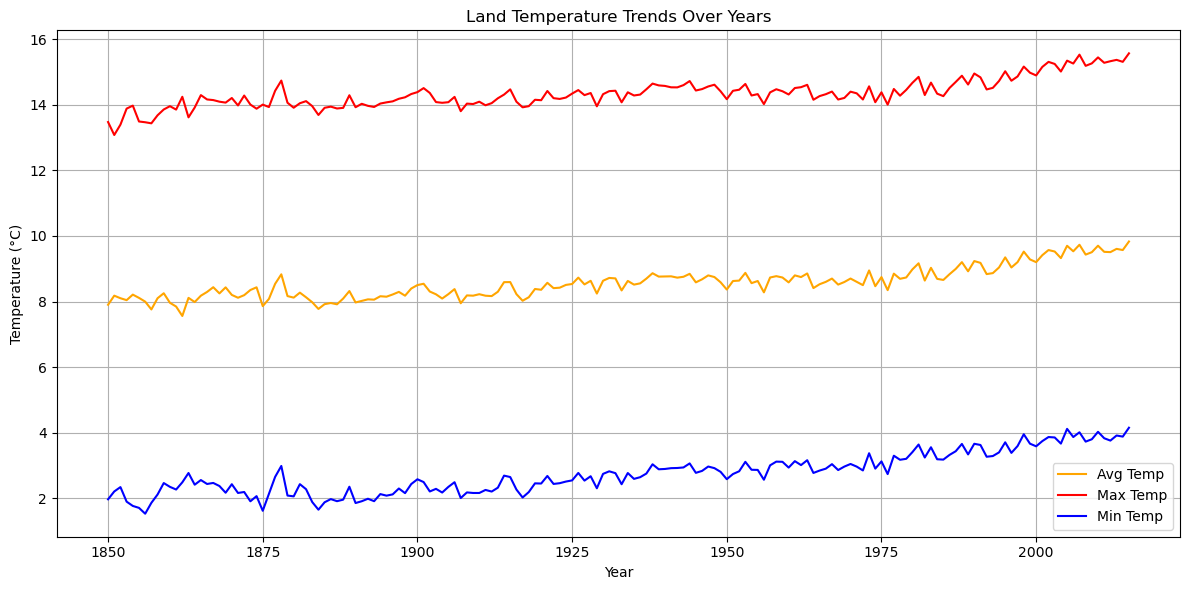

In [153]:
import matplotlib.pyplot as plt
yearly_avg = b.groupby('year')[['LandAverageTemperature', 'LandMaxTemperature', 'LandMinTemperature']].mean()

plt.figure(figsize=(12, 6))
plt.plot(yearly_avg.index, yearly_avg['LandAverageTemperature'], label='Avg Temp', color='orange')
plt.plot(yearly_avg.index, yearly_avg['LandMaxTemperature'], label='Max Temp', color='red')
plt.plot(yearly_avg.index, yearly_avg['LandMinTemperature'], label='Min Temp', color='blue')
plt.title('Land Temperature Trends Over Years')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


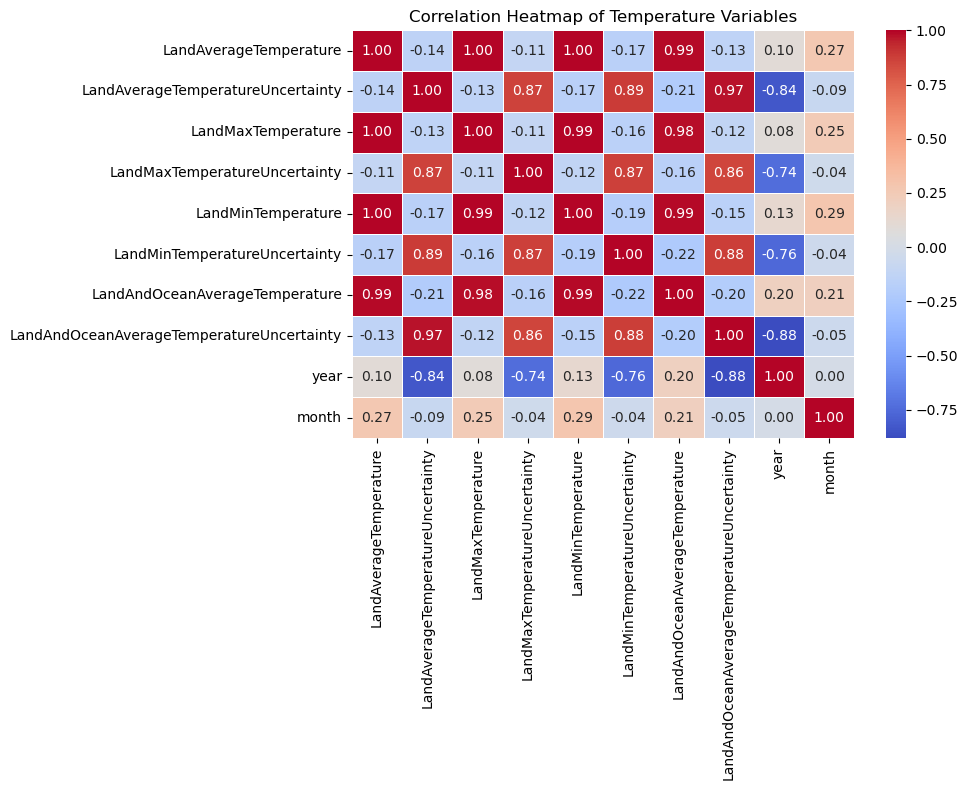

In [155]:
import seaborn as sns
import numpy as np

plt.figure(figsize=(10, 8))
sns.heatmap(b.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Temperature Variables')
plt.tight_layout()
plt.show()


C:\Users\laswi\AppData\Local\Temp\ipykernel_29780\577119820.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='month', y='LandAverageTemperature', data=b, palette='viridis')


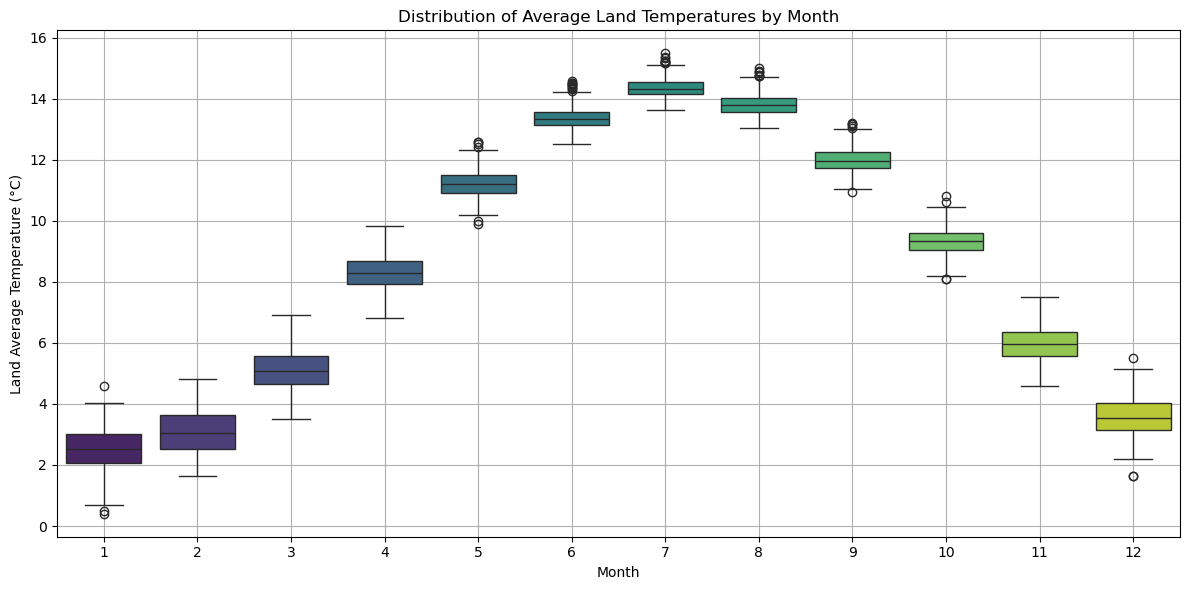

In [157]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='month', y='LandAverageTemperature', data=b, palette='viridis')
plt.title('Distribution of Average Land Temperatures by Month')
plt.xlabel('Month')
plt.ylabel('Land Average Temperature (°C)')
plt.grid(True)
plt.tight_layout()
plt.show()

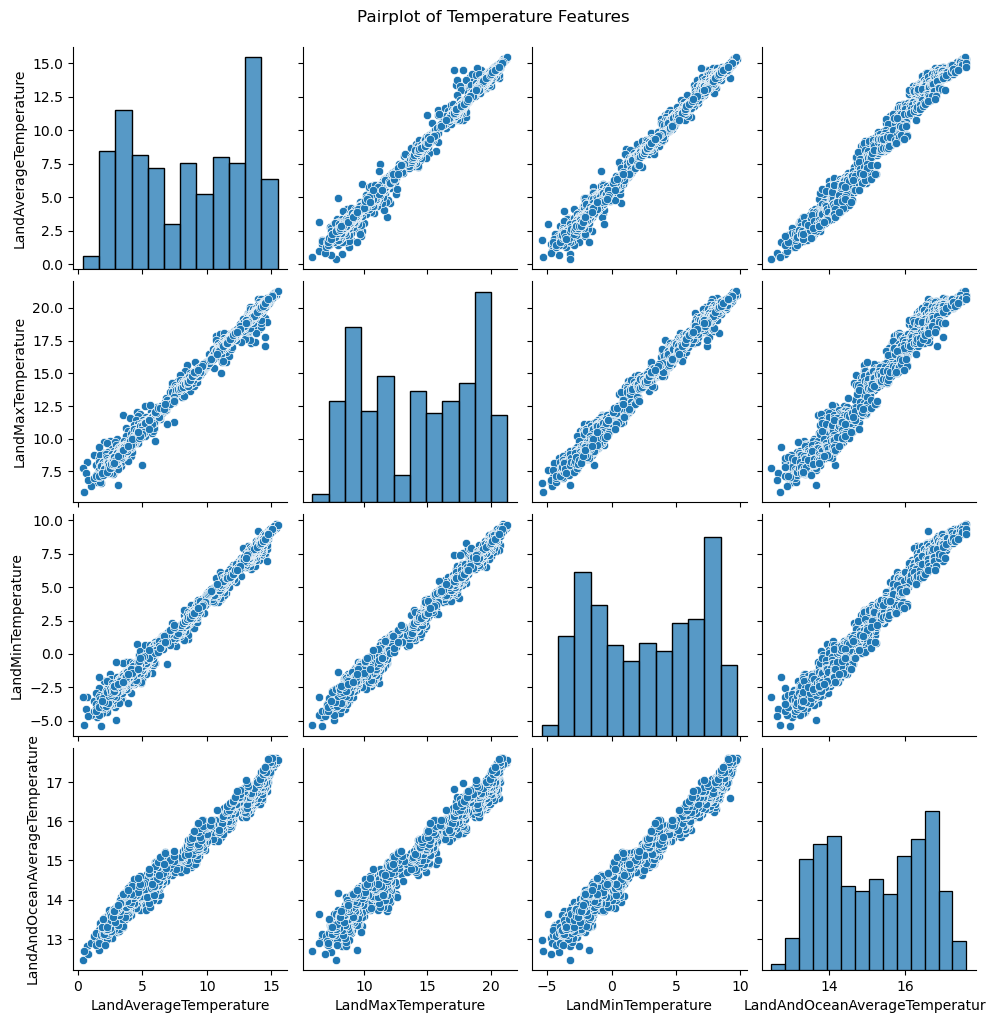

In [159]:
selected_features = [
    'LandAverageTemperature',
    'LandMaxTemperature',
    'LandMinTemperature',
    'LandAndOceanAverageTemperature'
]

sns.pairplot(b[selected_features])
plt.suptitle('Pairplot of Temperature Features', y=1.02)
plt.show()


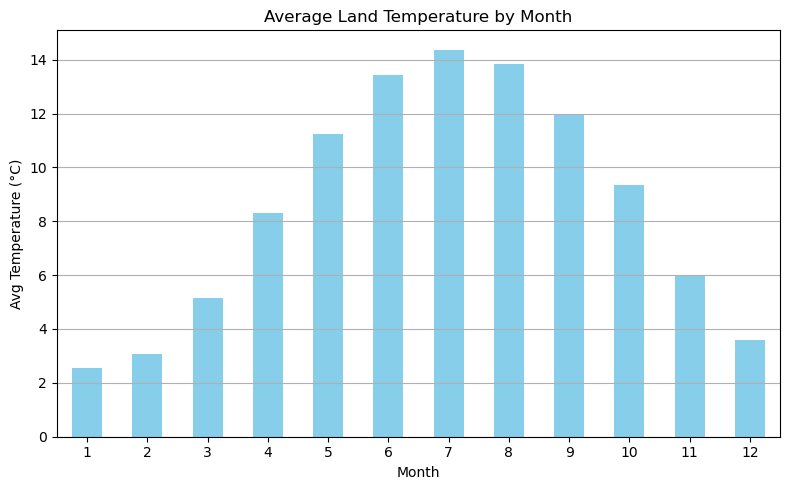

In [161]:
monthly_avg = b.groupby('month')['LandAverageTemperature'].mean()

plt.figure(figsize=(8, 5))
monthly_avg.plot(kind='bar', color='skyblue')
plt.title('Average Land Temperature by Month')
plt.xlabel('Month')
plt.ylabel('Avg Temperature (°C)')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()
